In [58]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


#nltk.download('all-nltk')   #popular, all-nltk

In [59]:
text = open('blake-poems.txt', 'r', encoding = 'latin-1').read()

In [60]:
sentences = text.split('.')  # splits at every period

# Take the first two sentences and join them back
first_two_sentences = '.'.join(sentences[:2]) + '.'

print(first_two_sentences)

[Poems by William Blake 1789]

 
SONGS OF INNOCENCE AND OF EXPERIENCE
and THE BOOK of THEL


 SONGS OF INNOCENCE
 
 
 INTRODUCTION
 
 Piping down the valleys wild,
   Piping songs of pleasant glee,
 On a cloud I saw a child,
   And he laughing said to me:
 
 "Pipe a song about a Lamb!"
   So I piped with merry cheer.
 "Piper, pipe that song again;"
   So I piped: he wept to hear.


In [61]:
import re

text = re.sub(r"[^\w\s]+|\s+", " ", text).strip()
#print(text)        # avoid priting long output


In [62]:
tokens = text.split()
tokens = [token.lower() for token in tokens if token.isalpha()]    #alphabet
# print(text)
# print(tokens)
print(len(tokens))

6934


In [63]:
freq = nltk.FreqDist(tokens)
freq

FreqDist({'the': 439, 'and': 348, 'of': 146, 'in': 141, 'i': 130, 'a': 128, 'to': 111, 'my': 83, 'with': 66, 'his': 57, ...})

In [64]:
stop_words = stopwords.words('english') 
print(stop_words)
print(len(stop_words))


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [65]:
ctokens = tokens.copy()
for token in tokens:
    if token in stop_words:
        ctokens.remove(token)

#print(ctokens)
print("After removing the stop words, the clean number of tokens is " + str(len(ctokens)))


After removing the stop words, the clean number of tokens is 3805


In [66]:
freq2 = nltk.FreqDist(ctokens)
freq2

FreqDist({'little': 45, 'thee': 42, 'like': 35, 'thou': 35, 'thy': 31, 'love': 29, 'sweet': 28, 'night': 28, 'joy': 25, 'away': 24, ...})

In [67]:
lemmatizar = WordNetLemmatizer()
for i in range(len(ctokens)):
    ctokens[i] = lemmatizar.lemmatize(ctokens[i])
# print(ctokens)
print("After lemmatisation, the number of tokens is " + str(len(ctokens)))


After lemmatisation, the number of tokens is 3805


In [68]:
from nltk.corpus import opinion_lexicon

#nltk.download('opinion_lexicon')
positive_words = opinion_lexicon.positive()
negative_words = opinion_lexicon.negative()
print(len(positive_words), len(negative_words))
print(positive_words)
print(negative_words)

2006 4783
['a+', 'abound', 'abounds', 'abundance', 'abundant', ...]
['2-faced', '2-faces', 'abnormal', 'abolish', ...]


In [69]:
countpositive = countnegative = countneutral = counttotal = 0

for token1 in ctokens:
    counttotal = counttotal + 1
    #counttotal += 1
    cat = ""

    if token1 in positive_words:
        countpositive = countpositive + 1
        cat = cat + "POS"
        #cat += "POS"
    elif token1 in negative_words:
        countnegative = countnegative + 1
        cat = cat + "NEG"
        #cat += "NEG"
    else:
        countneutral = countneutral + 1
        #countneutral += 1

for i, token1 in enumerate(ctokens[:20]):  # first 20 tokens
    cat = ""
    if token1 in positive_words:
        cat = "POS"
    elif token1 in negative_words:
        cat = "NEG"
    else:
        cat = "NEUTRAL"
    print(token1, cat)


poem NEUTRAL
william NEUTRAL
blake NEUTRAL
song NEUTRAL
innocence NEUTRAL
experience NEUTRAL
book NEUTRAL
thel NEUTRAL
song NEUTRAL
innocence NEUTRAL
introduction NEUTRAL
piping NEUTRAL
valley NEUTRAL
wild NEG
piping NEUTRAL
song NEUTRAL
pleasant POS
glee POS
cloud NEG
saw NEUTRAL


In [70]:
print(countpositive, countnegative, countneutral, counttotal)

453 399 2953 3805


In [71]:
import math

print("positive = %.2f Negative = %.2f Neutral = %.2f" % (countpositive/counttotal, countnegative/counttotal, countneutral/counttotal) )
print("Positiveness = %.2f Affection = %.2f" % (math.log(countpositive/countnegative), 1-countneutral/counttotal))


positive = 0.12 Negative = 0.10 Neutral = 0.78
Positiveness = 0.13 Affection = 0.22


In [72]:
from nltk.tokenize import word_tokenize

tokens2 = word_tokenize(text)
# tokens2

In [73]:
tagged = nltk.pos_tag(tokens2)
# tagged

In [74]:
#!python -m pip install svgling

entities = nltk.chunk.ne_chunk(tagged)
entities

In [75]:
from nltk.corpus import treebank
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()
t.pretty_print()

                                                     S                                                                         
                         ____________________________|_______________________________________________________________________   
                        |                                               VP                                                   | 
                        |                        _______________________|___                                                 |  
                      NP-SBJ                    |                           VP                                               | 
         _______________|___________________    |     ______________________|______________________________________          |  
        |          |              ADJP      |   |    |        |                PP-CLR                              |         | 
        |          |           ____|____    |   |    |        |          ________|_________          

# Sentence tokenisation

In [76]:
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(text)
# sentences

Regexp tokenisation:

In [77]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
reg_exp_tokens = tokenizer.tokenize(text)
# reg_exp_tokens

# Compare stemming with lemmatisation

Porter stemmer

In [78]:
stemmer_porter = PorterStemmer()
stemmed_tokens_porter = [stemmer_porter.stem(token) for token in tokens]
# print(stemmed_tokens_porter)
print("Number of Porter stemmed tokens is " + str(len(stemmed_tokens_porter)))


Number of Porter stemmed tokens is 6934


Snowball Stemmer

In [79]:
from nltk.stem import SnowballStemmer

stemmer_snow = SnowballStemmer("english")
stemmed_tokens_snow = [stemmer_snow.stem(token) for token in tokens]
#print(stemmed_tokens_snow)
print("Number of Snowball stemmed tokens is " + str(len(stemmed_tokens_snow)))

Number of Snowball stemmed tokens is 6934


In [80]:
print(f"{'Original ' + str(len(tokens)):20} {'Stemmed porter ' + str(len(stemmed_tokens_porter)):25} {'Stemmed snowball ' + str(len(stemmed_tokens_snow)):25} {'Lemmatised '+ str(len(ctokens)):20}")
print("-"*90)
for original, stemmed_port, stemmed_snow, lemmatized in zip(tokens, stemmed_tokens_porter, stemmed_tokens_snow, ctokens):
    print(f"{original:20} {stemmed_port:25} {stemmed_snow:25} {lemmatized:20}")

Original 6934        Stemmed porter 6934       Stemmed snowball 6934     Lemmatised 3805     
------------------------------------------------------------------------------------------
poems                poem                      poem                      poem                
by                   by                        by                        william             
william              william                   william                   blake               
blake                blake                     blake                     song                
songs                song                      song                      innocence           
of                   of                        of                        experience          
innocence            innoc                     innoc                     book                
and                  and                       and                       thel                
of                   of                        of              

# Named Entity Recognition (NER)

In [81]:
entities = nltk.chunk.ne_chunk(tagged)
for subtree in entities:
    if hasattr(subtree, 'label'):
        print(subtree.label(), ' '.join(c[0] for c in subtree))

PERSON William Blake
ORGANIZATION SONGS OF
ORGANIZATION INNOCENCE
ORGANIZATION THE
ORGANIZATION BOOK
ORGANIZATION THEL
PERSON Piper
PERSON Drop
PERSON Piper
ORGANIZATION THE
ORGANIZATION SHEPHERD How
ORGANIZATION Shepherd
ORGANIZATION Shepherd
ORGANIZATION THE
ORGANIZATION ECHOING
PERSON Green Old John
PERSON Green Till
ORGANIZATION THE
ORGANIZATION LAMB Little
PERSON Gave
GPE Softest
PERSON Little Lamb God
PERSON Little Lamb God
ORGANIZATION THE
ORGANIZATION LITTLE
FACILITY White
GPE English
PERSON Look
ORGANIZATION Comfort
ORGANIZATION THE
ORGANIZATION BLOSSOM Merry
ORGANIZATION THE
ORGANIZATION CHIMNEY
PERSON Tom Dacre
PERSON Hush Tom
PERSON Tom
PERSON Dick Joe Ned
PERSON Jack Were
PERSON Angel
PERSON Tom
PERSON Tom
PERSON Tom
ORGANIZATION THE
ORGANIZATION LITTLE
ORGANIZATION LOST Father
ORGANIZATION THE
ORGANIZATION LITTLE
PERSON Began
PERSON God
ORGANIZATION LAUGHING
ORGANIZATION SONG
PERSON Mary
PERSON Susan
GPE Ha
ORGANIZATION SONG Sweet
PERSON Sweet Sleep
PERSON Weave
PERSON Sw

In [82]:
from nltk.util import ngrams
bigrams = list(ngrams(tokens, 2))

for bigram in bigrams[:20]:
    print(bigram)

('poems', 'by')
('by', 'william')
('william', 'blake')
('blake', 'songs')
('songs', 'of')
('of', 'innocence')
('innocence', 'and')
('and', 'of')
('of', 'experience')
('experience', 'and')
('and', 'the')
('the', 'book')
('book', 'of')
('of', 'thel')
('thel', 'songs')
('songs', 'of')
('of', 'innocence')
('innocence', 'introduction')
('introduction', 'piping')
('piping', 'down')


In [83]:
trigrams = list(ngrams(tokens, 3))
for trigram in trigrams[:20]:
    print(trigram)


('poems', 'by', 'william')
('by', 'william', 'blake')
('william', 'blake', 'songs')
('blake', 'songs', 'of')
('songs', 'of', 'innocence')
('of', 'innocence', 'and')
('innocence', 'and', 'of')
('and', 'of', 'experience')
('of', 'experience', 'and')
('experience', 'and', 'the')
('and', 'the', 'book')
('the', 'book', 'of')
('book', 'of', 'thel')
('of', 'thel', 'songs')
('thel', 'songs', 'of')
('songs', 'of', 'innocence')
('of', 'innocence', 'introduction')
('innocence', 'introduction', 'piping')
('introduction', 'piping', 'down')
('piping', 'down', 'the')


In [84]:
print("number of bigrams is " + str(len(bigrams)))
print("number of trigrams is " + str(len(trigrams)))


number of bigrams is 6933
number of trigrams is 6932


# WordNet for Semantic Analysis

In [85]:
from nltk.corpus import wordnet
syns = wordnet.synsets('good')
print(syns[0].definition(), syns[0].lemmas())

benefit [Lemma('good.n.01.good')]


# Visualisations

Word Frequency Distribution

<Axes: xlabel='Samples', ylabel='Counts'>

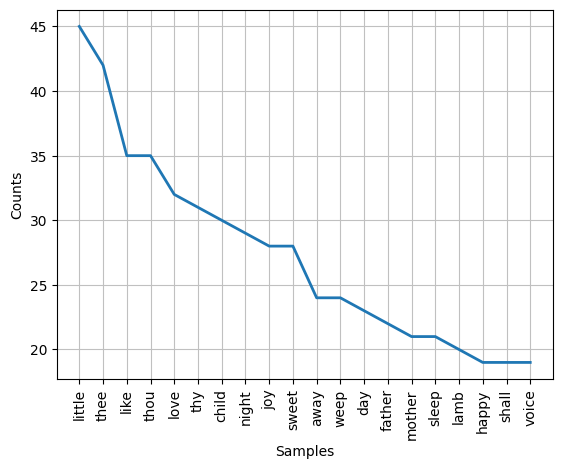

In [86]:
from nltk import FreqDist
import matplotlib.pyplot as plt

fdist = FreqDist(ctokens)  # cleaned tokens
fdist.plot(20, cumulative=False)  # top 30 words

POS frequency

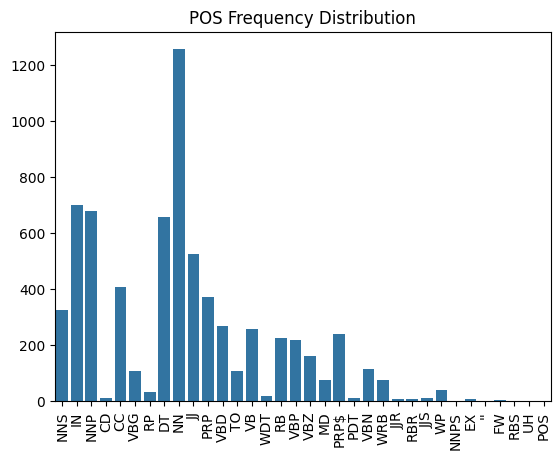

In [87]:
import nltk
from collections import Counter
tagged = nltk.pos_tag(tokens2)      # take original tokens (tokens2) not lemmatised ones
pos_counts = Counter(tag for word, tag in tagged)

import seaborn as sns
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.xticks(rotation=90)
plt.title("POS Frequency Distribution")
plt.show()

Sentiment based visuals

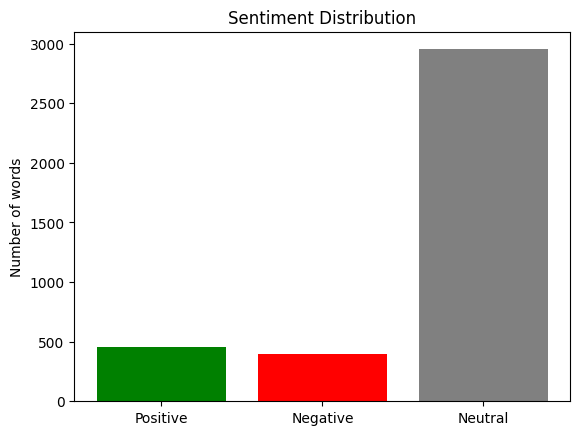

In [88]:
labels = ['Positive', 'Negative', 'Neutral']
counts = [countpositive, countnegative, countneutral]

plt.bar(labels, counts, color=['green','red','grey'])
plt.title("Sentiment Distribution")
plt.ylabel("Number of words")
plt.show()

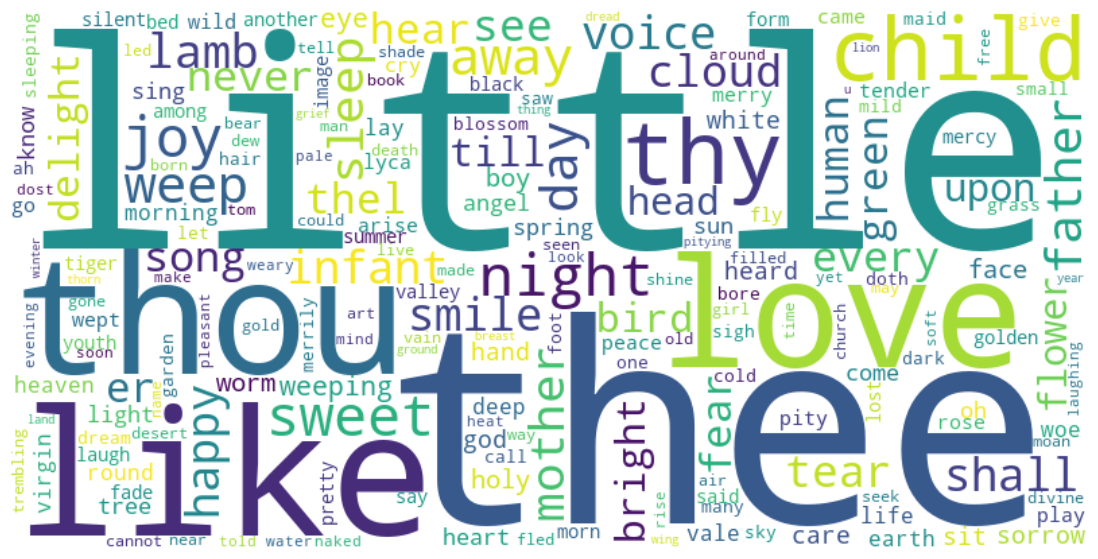

In [89]:
#!python -m pip install wordcloud

from wordcloud import WordCloud

freq_dict = dict(FreqDist(ctokens))

# Generate word cloud from exact counts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [90]:
from nltk import ngrams
from collections import Counter

bigrams = list(ngrams(ctokens, 2))
bigram_freq = Counter(bigrams).most_common(10)
bigram_freq

[(('little', 'boy'), 8),
 (('little', 'lamb'), 7),
 (('fade', 'away'), 6),
 (('human', 'form'), 5),
 (('thee', 'little'), 4),
 (('tell', 'thee'), 4),
 (('hear', 'voice'), 4),
 (('weep', 'weep'), 4),
 (('like', 'thee'), 4),
 (('mercy', 'pity'), 4)]

C:\Users\ma053309\AppData\Local\Temp\ipykernel_15124\1961035010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=bigrams_labels, palette = colours)


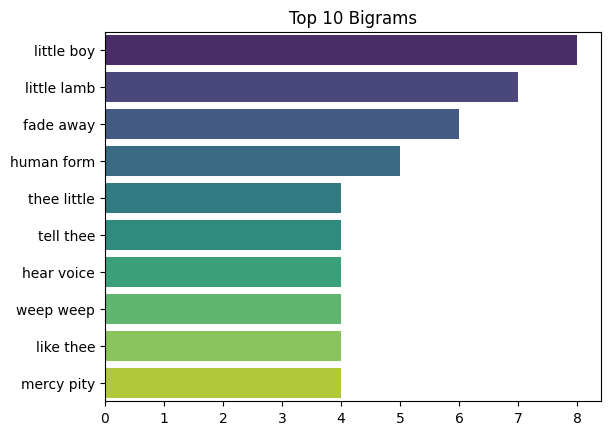

In [91]:
import seaborn as sns
bigrams_labels = [' '.join(b) for b,c in bigram_freq]
counts = [c for b,c in bigram_freq]

colours = sns.color_palette("viridis", len(bigrams_labels))  # or any palette like "Set2", "coolwarm"


sns.barplot(x=counts, y=bigrams_labels, palette = colours)
plt.title("Top 10 Bigrams")
plt.show()

Lexical diversity / ration metrics

In [92]:
lexical_diversity = len(set(ctokens)) / len(ctokens)
print("Lexical diversity:", lexical_diversity)


Lexical diversity: 0.33377135348226017


In [93]:
from nltk import ne_chunk
from nltk.tree import Tree

named_entities = []

for subtree in entities:
    if isinstance(subtree, Tree):  # Only subtrees represent named entities
        entity_name = " ".join([token for token, pos in subtree.leaves()])
        entity_type = subtree.label()
        named_entities.append((entity_name, entity_type))

# Count entity occurrences
entity_counts = Counter(named_entities)

# Display results
print("Named Entities and Counts:")
for entity, count in entity_counts.items():
    print(f"{entity}: {count}")

Named Entities and Counts:
('William Blake', 'PERSON'): 2
('SONGS OF', 'ORGANIZATION'): 3
('INNOCENCE', 'ORGANIZATION'): 2
('THE', 'ORGANIZATION'): 26
('BOOK', 'ORGANIZATION'): 3
('THEL', 'ORGANIZATION'): 2
('Piper', 'PERSON'): 2
('Drop', 'PERSON'): 1
('SHEPHERD How', 'ORGANIZATION'): 1
('Shepherd', 'ORGANIZATION'): 2
('ECHOING', 'ORGANIZATION'): 1
('Green Old John', 'PERSON'): 1
('Green Till', 'PERSON'): 1
('LAMB Little', 'ORGANIZATION'): 1
('Gave', 'PERSON'): 1
('Softest', 'GPE'): 1
('Little Lamb God', 'PERSON'): 2
('LITTLE', 'ORGANIZATION'): 8
('White', 'FACILITY'): 1
('English', 'GPE'): 1
('Look', 'PERSON'): 1
('Comfort', 'ORGANIZATION'): 1
('BLOSSOM Merry', 'ORGANIZATION'): 1
('CHIMNEY', 'ORGANIZATION'): 2
('Tom Dacre', 'PERSON'): 1
('Hush Tom', 'PERSON'): 1
('Tom', 'PERSON'): 4
('Dick Joe Ned', 'PERSON'): 1
('Jack Were', 'PERSON'): 1
('Angel', 'PERSON'): 2
('LOST Father', 'ORGANIZATION'): 1
('Began', 'PERSON'): 1
('God', 'PERSON'): 2
('LAUGHING', 'ORGANIZATION'): 1
('SONG', 'ORGA